In [1]:
#Four functions 
#Function 1: Creates White Noisemap 
#Function 2: Reads in Hitsmap 
#Function 3: Creates Noisemap
#Function 4: Beam Convolution 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy 
import math 
import scipy 
import healpy as hp #read in hitsmaps with healpy
%matplotlib inline
import camb 
import warnings
warnings.filterwarnings("ignore")
import limpy as lp
import limpy.utils as lu

In [3]:
from pylab import imshow
from numpy import random
from PIL import Image
from numpy.linalg import inv
from __future__ import division
from matplotlib import gridspec
from matplotlib import colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.visualization import astropy_mpl_style #color/plotting
plt.style.use(astropy_mpl_style)
from astropy.convolution import convolve, Gaussian2DKernel, Tophat2DKernel #beam convolution 
from astropy.modeling.models import Gaussian2D

In [4]:
#Hitsmap as fits

In [5]:
#file='/Users/marxena/Desktop/toast_hits.fits' #put directory of file working with
file='/Users/marxena/Desktop/1.fits'

0.0 180.0 -180.0 180.0


(12582912,)


<Figure size 864x576 with 0 Axes>

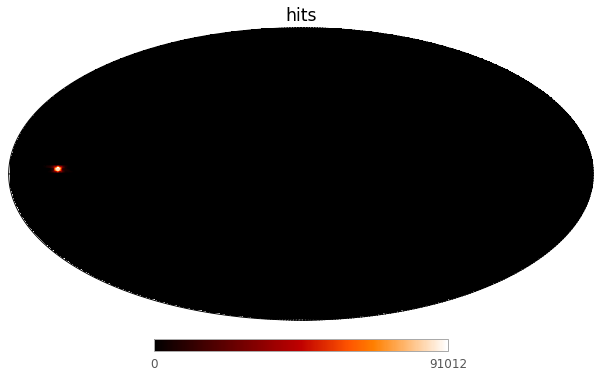

In [6]:
plt.figure(figsize=[12, 8])
hitmap = hp.read_map("TEST.fits")
#hitmap[hitmap == 0] = hp.UNSEEN #Hitsmap will not show if this is not commented out
#hp.gnomview(hitmap, title="hits")
hp.mollview(hitmap, title="hits")
hp.graticule(22.5, verbose=False)
print(np.shape(hitmap))

In [7]:
#array_2d=np.reshape(hitmap,(4000,4000))
#np.pad(array_2d, [(0, 1), (0, 1)],mode='constant')

In [8]:
#nn=len(hitmap)
##hitmap.reshape(nn//2, nn//2)
#nsquare=int(np.sqrt(nn))

In [9]:
#hnew = hitmap[0: nsquare**2]
#mask=hnew>0
#hnew1=hnew[mask]
#x=hnew.reshape(nsquare, nsquare)
#x1=np.where(x>0,x,5)
#len(x1[x1!=5])
#h=x1[x1!=5]
#max(h)

In [10]:
#len(hnew)
#len(h)/len(hnew)*100

In [11]:
#generate the hitsmap based off the file
def Hitsmap(FILE):
    x=fits.open(FILE)
    x.info()
    hdu=x[0]
    hdu.header
    image_data = fits.getdata(FILE, ext=0)
    print(image_data.shape)
    array=hdu.data
    HIT = np.sum(array, axis=0)
    return HIT

In [12]:
Hitsmap=Hitsmap(file)
shape=np.shape(Hitsmap)

Filename: /Users/marxena/Desktop/1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   (36, 27, 3)   int16 (rescales to uint16)   
(3, 27, 36)


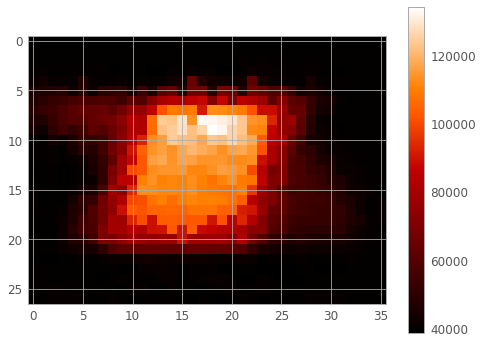

In [13]:
imshow(Hitsmap)
plt.colorbar()

In [14]:
#White Noise

In [15]:
#generates random matrix 
#added another random matrix for atmosphere 
def WhiteNoiseMap(x_dim,y_dim):
    ANoise=1 
    WNoise=np.random.randn(x_dim,y_dim)*ANoise
    atmosphere=np.random.randn(x_dim,y_dim)*WNoise
    return atmosphere
    #return WNoise

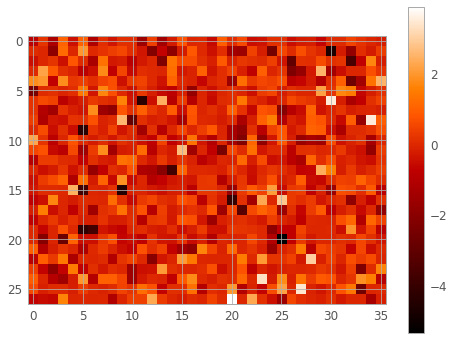

In [16]:
WhiteNoise=WhiteNoiseMap(shape[0],shape[1])
#WhiteNoise=WhiteNoiseMap(200,200)
imshow(WhiteNoise)
plt.colorbar()

In [17]:
#generates a random array of value one with a set 'hit' equaling five
#def Hitsmap():
#    x_dim=y_dim=50 #had to redefine it 
#    Hit=np.ones([x_dim,y_dim])
#    offset=10
#    Hit[x_dim//2-offset:x_dim//2+offset,y_dim//2-offset:y_dim//2+offset]=5
 #   return(Hit)

In [18]:
#Hitsmap()

In [19]:
#Noisemap
#inputs the WhiteNoise and Hitsmap to generate the Noisemap. 
def Noisemap(hitsmap, whitenoise):
    shape = np.shape(hitsmap)
    xs= shape[0]
    ys =shape[1]
    W=WhiteNoiseMap(xs, ys) 
    N= whitenoise/hitsmap
    return N

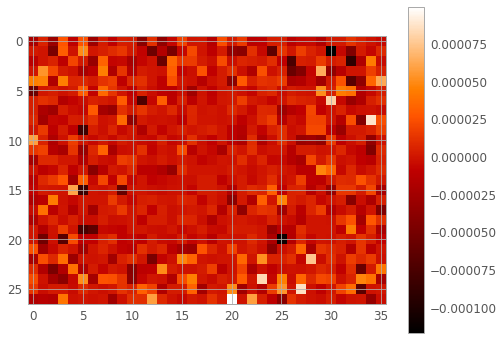

In [20]:
NM=Noisemap(Hitsmap,WhiteNoise)
imshow(NM)
plt.colorbar()

In [21]:
#show_arrays()

In [22]:
def plot_figure(WhiteNoise, Hitsmap, NM, figname="Maps.png"):
    fig, axx = plt.subplots(figsize=(9,9), dpi=100, nrows=1, ncols=3) #the ordering
    axx[0].imshow(WhiteNoise)#,cmap='afmhot')
    axx[1].imshow(Hitsmap)#,cmap='afmhot')
    axx[2].imshow(NM)#,cmap='afmhot')

    plt.tight_layout()

    plt.colorbar(imshow(WhiteNoise),ax=axx[0],fraction=0.04)
    plt.colorbar(imshow(Hitsmap),ax=axx[1],fraction=0.04)
    plt.colorbar(imshow(NM),ax=axx[2],fraction=0.04)

    if figname: 
                 plt.savefig(figname,bbox_inches='tight')
    else:
                 plt.savefig("Maps.png",bbox_inches='tight')
            
    plt.show()

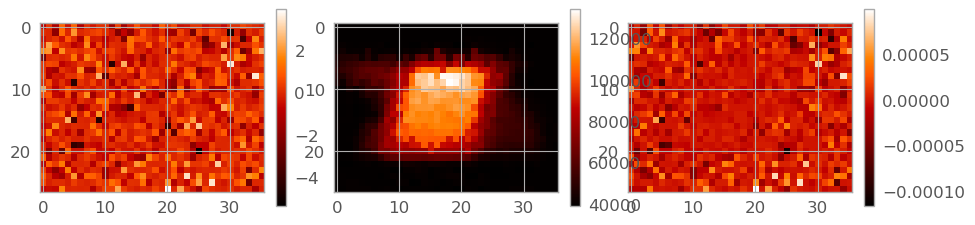

In [23]:
plot_figure(WhiteNoise, Hitsmap, NM, figname="Maps.png")

In [24]:
#def BeamCon(Noisemap,Beams): 
#    N=Noisemap()
#    Beams=1
#    imshow(BeamCon)
#    return(BeamCon)
#BeamCon(Noisemap(),1)

In [25]:
#Atmospheric noise-- add to whitenoisemap  -maybe kinda done?
#beam convolution -- from limpy lline.py 
#read helpix (the real hitsmap)  --need a real hitsmap 
#normalization of the white noise (NDist/hit), wait for the calculation
#use power spectra to check if everything works -Where to find power spectra/how to get??

In [26]:
def BeamCon(): 
    gauss = Gaussian2D(4, 1, 2, 3, 5) #gauss kernel, can change as needed (wrong for this code, cant be random)
    
    gauss_kernel = Gaussian2DKernel(2)  #std dev=2pix 
    #tophat_kernel = Tophat2DKernel(5)   #width=5pix
    
    smoothed_data_gauss = convolve(NM, gauss_kernel)
    #smoothed_data_gauss = convolve(NM, tophat_kernel)
    
    Beam=imshow(smoothed_data_gauss)
    plt.colorbar()
    
    return Beam

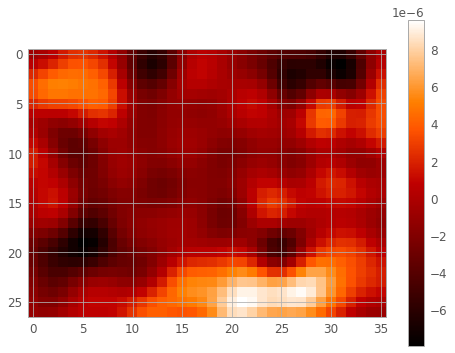

In [27]:
BeamCon()

In [28]:
#beamcon in lline.py

In [29]:
#def beam_convolution(grid_quantity, theta_fwhm, beam_unit, boxsize, ngrid, halo_redshift, line_name='CII158', quantity='intensity'):
 #   theta=lu.convert_beam_unit_to_radian(theta_fwhm, beam_unit=beam_unit)
  #  beam_size=lu.angle_to_comoving_size(halo_redshift, theta)
  #  beam_std=beam_size/(np.sqrt(8*np.log(2.0))) 
   # gauss_kernel = Gaussian2DKernel(beam_std)
   # convolved_grid = convolve(grid_quantity, gauss_kernel)
   # return convolved_grid

In [30]:
#beam_convolution(30, 30, 'degrees', 30, 5, 6, line_name='CII158', quantity='intensity')

In [35]:
theta_fwhm=30
beam_unit='degree'
theta=lu.convert_beam_unit_to_radian(theta_fwhm, beam_unit=beam_unit)
print(theta)

0.5235987755982988


In [36]:
halo_redshift=7
beam_size=lu.angle_to_comoving_size(halo_redshift, theta)
print(beam_size)

6418.894834846312


In [37]:
beam_std=beam_size/(np.sqrt(8*np.log(2.0))) 
print(beam_std)

2725.853658495568


In [41]:
gauss_kernel = Gaussian2DKernel(beam_std) 
print(gauss_kernel)

In [46]:
#grid_quantity=10
convolved_grid = convolve(NM,gauss_kernel)#THIS TOOK TWENTY MINUTES TO RUN 
                                            #why does this take long to run???

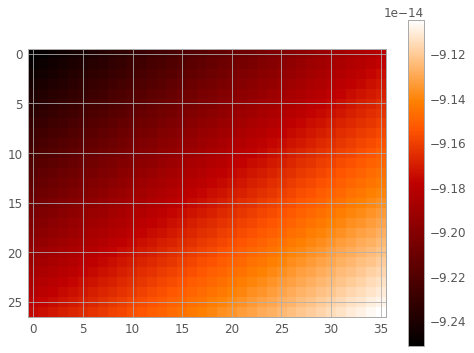

In [48]:
imshow(convolved_grid)
plt.colorbar()